# Predicting California Housing Prices Using Machine Learning Models

## Importing libraries


In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the CSV file

In [348]:
data = pd.read_csv("housing.csv")

### Summary statistics of the data

In [349]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [350]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From the info we can conclude that we have sufficient data to do a machine learning model

### Model for predicting Median House Value

In [352]:
from sklearn.model_selection import train_test_split

x = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

### Train Test Split

In [353]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [354]:
train_data = x_train.join(y_train)

### Train data

In [355]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,<1H OCEAN,193800.0
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,NEAR OCEAN,169700.0
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,NEAR OCEAN,259800.0
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,INLAND,136100.0
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,NEAR BAY,500001.0
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,283500.0


### Histogram of Train data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

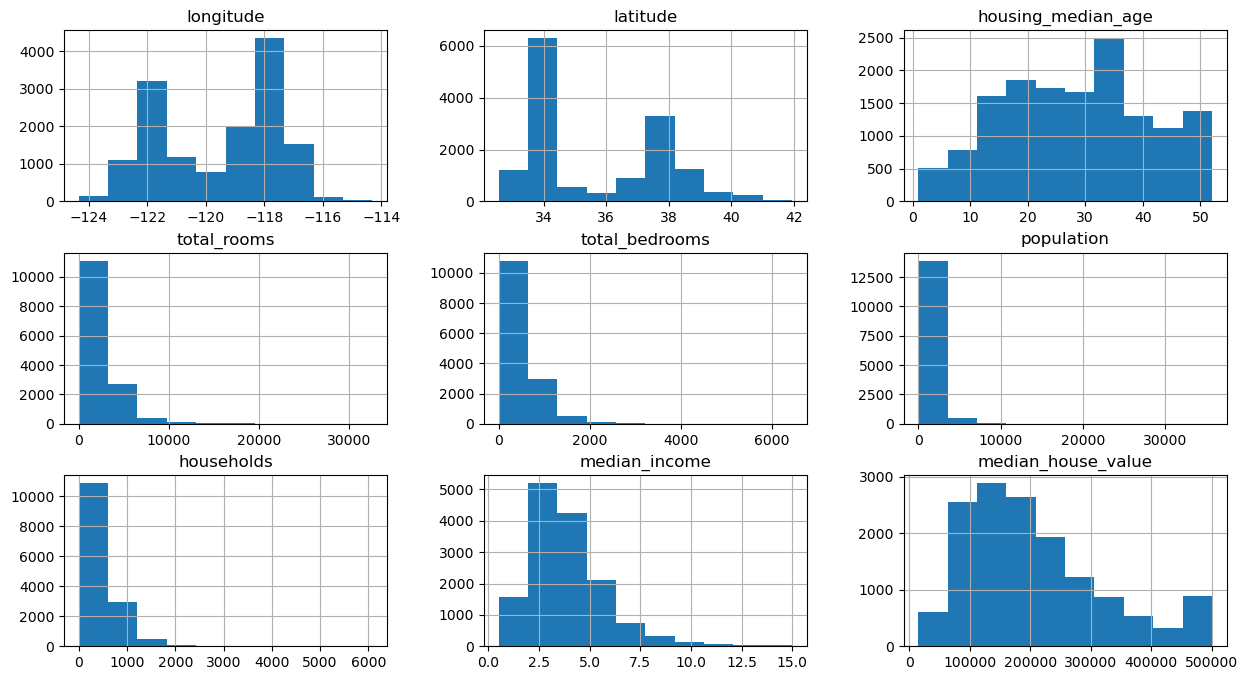

In [356]:
train_data.hist(figsize=(15, 8))

From the histograms, the variables total_rooms, total_bedrooms, population, households, median_income, and median_house_value exhibit right-skewed distributions. In each case, most observations are concentrated at lower values, while a small number of very large values create a long tail extending to the right.

In contrast, longitude and latitude do not show clear skewness and instead appear multimodal due to geographical clustering. The housing_median_age variable shows only mild skewness.

### Visualing correlation matrix using heatmap from seaborn

<Axes: >

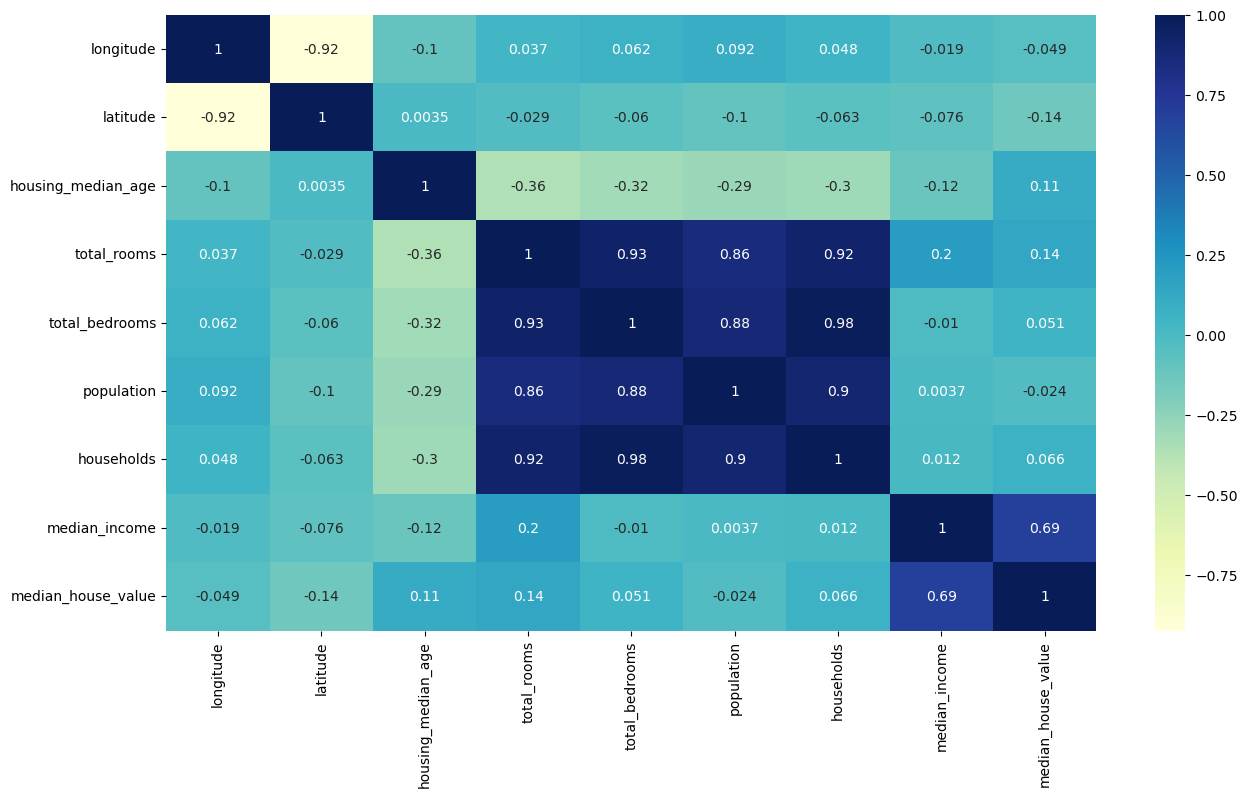

In [357]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Log transformation of Skewed Numerical Features

In [358]:
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"]+1)
train_data["population"] = np.log(train_data["population"]+1)
train_data["households"] = np.log(train_data["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

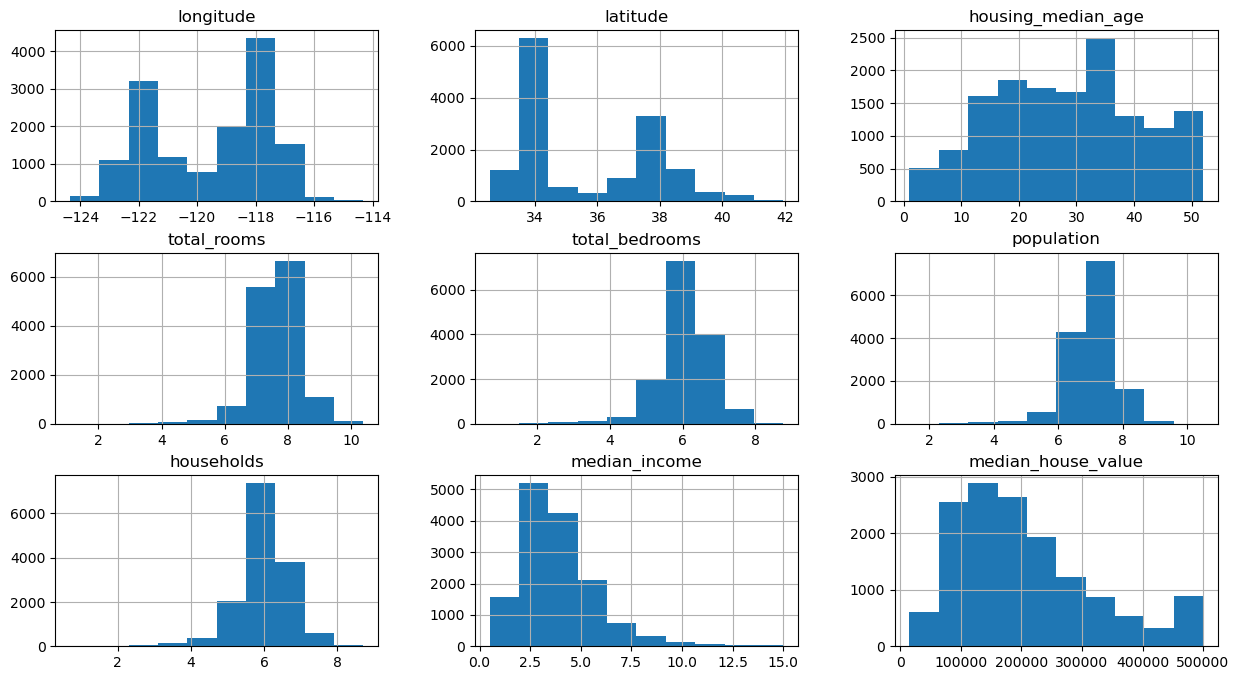

In [359]:
train_data.hist(figsize=(15,8))

After applying the log transformation, the previously right-skewed variables (total_rooms, total_bedrooms, population, and households) now exhibit distributions that are more symmetric and closer to normal. The long right tails have been compressed, reducing the influence of extreme values.

This transformation helps stabilise variance and makes the features more suitable for models that assume linear relationships, such as linear regression.

### Converting ocean proximity to numerical values

In [360]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6413
INLAND        4613
NEAR OCEAN    1797
NEAR BAY      1621
ISLAND           4
Name: count, dtype: int64

In [361]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [362]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7061,-118.02,33.93,35.0,7.783641,5.988961,7.105786,6.013715,4.1312,193800.0,1,0,0,0,0
14689,-117.09,32.79,20.0,7.688913,6.282267,6.907755,6.208590,2.8631,169700.0,0,0,0,0,1
17323,-120.14,34.59,24.0,7.379008,5.645447,6.595781,5.655992,4.2026,259800.0,0,0,0,0,1
10056,-121.00,39.26,14.0,6.698268,5.023881,5.713733,4.934474,3.1094,136100.0,0,1,0,0,0
15750,-122.45,37.77,52.0,8.067463,6.563856,7.331060,6.499787,3.3068,500001.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,229200.0,1,0,0,0,0
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,97800.0,0,1,0,0,0
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,222100.0,1,0,0,0,0
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,1,0,0,0,0


### Visualising the heapmap

<Axes: >

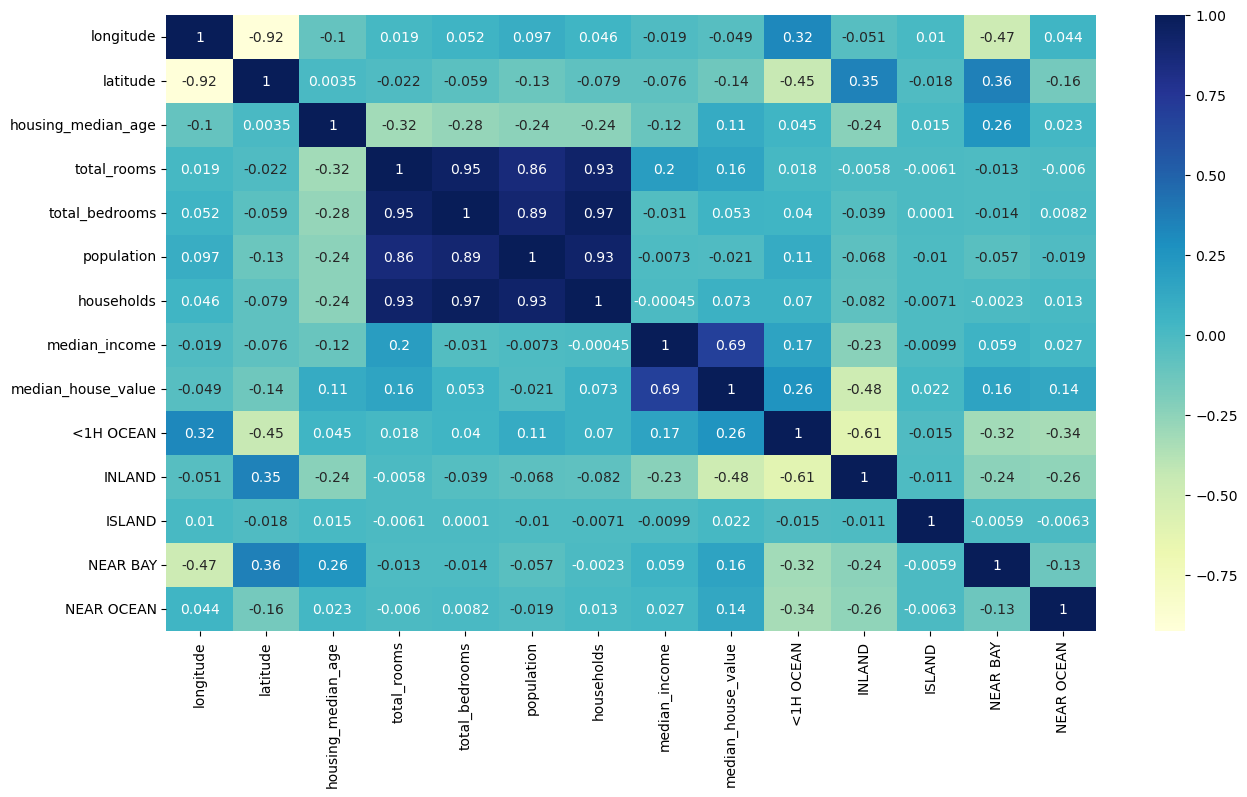

In [363]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Geographical Relationship Between Location and House Prices

<Axes: xlabel='latitude', ylabel='longitude'>

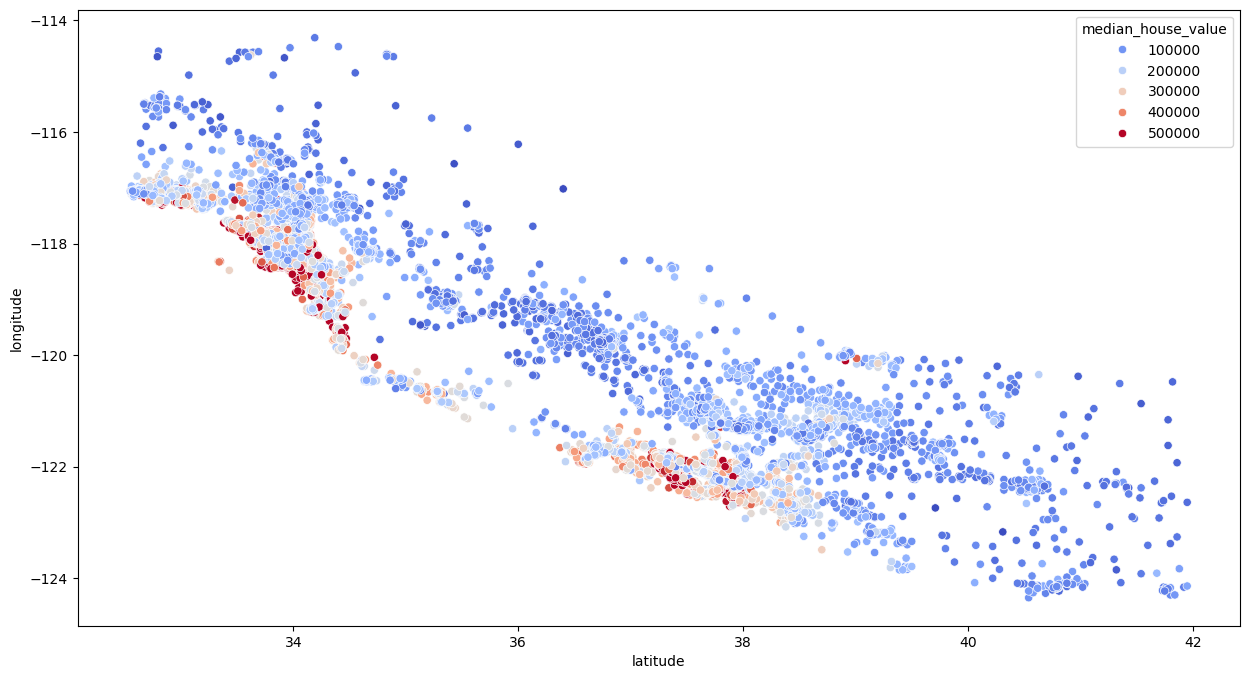

In [364]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

The scatter plot shows the geographical distribution of housing data using latitude and longitude, with colour indicating the median house value. Higher house values are concentrated along the coastal regions, particularly around major urban areas, while inland regions tend to have lower house values.

This pattern indicates a strong spatial dependence of house prices, suggesting that location is a key factor in determining housing value.

### Creating Ratio-Based Features

In [365]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

<Axes: >

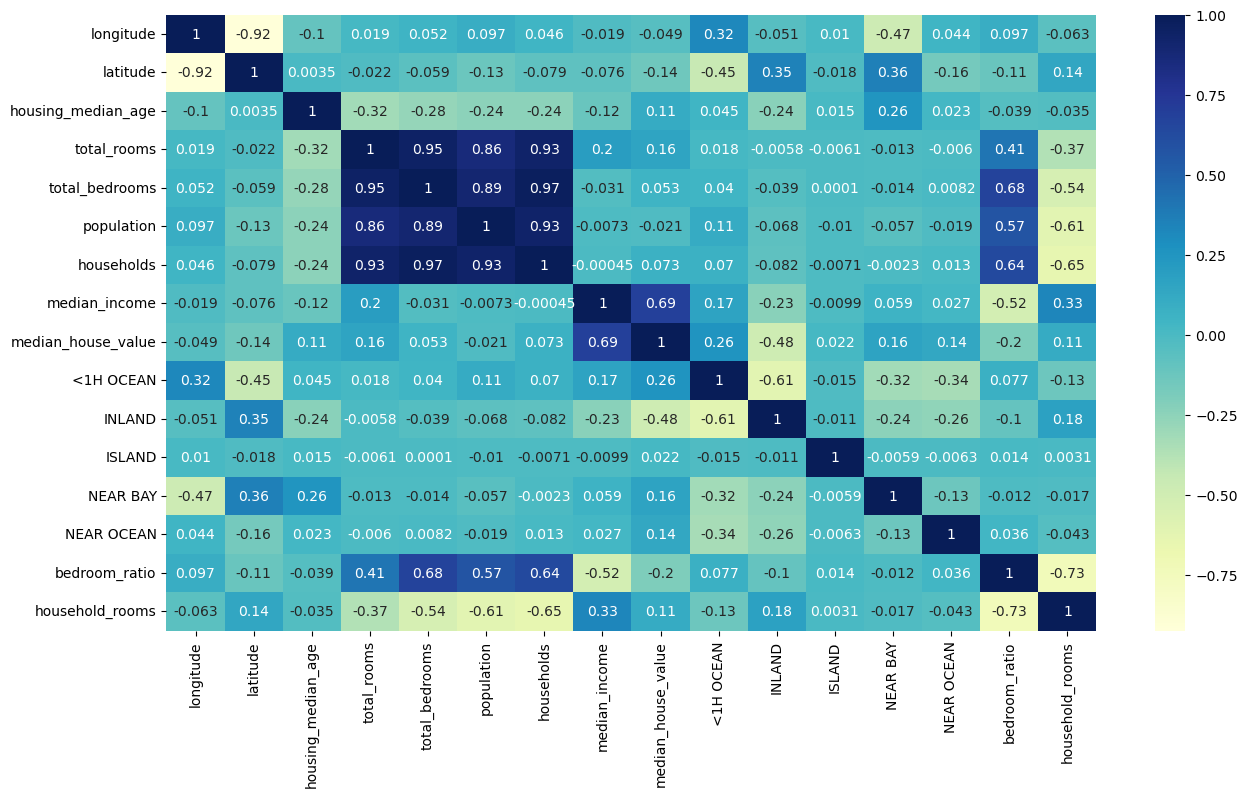

In [366]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Training a Linear Regression Model

In [367]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data = train_data.dropna()
x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Preprocessing the Test Dataset

In [368]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"]+1)
test_data["population"] = np.log(test_data["population"]+1)
test_data["households"] = np.log(test_data["households"]+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)
test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]

### Splitting the Test Data into Features and Target

The test data is split into features and target variables to allow model evaluation on unseen observations.

In [369]:
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

### Handling Missing Values (NaNs) Before Model Evaluation

In [370]:
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]

### Evaluating the Linear Regression Using $R^2$

In [371]:
reg.score(x_test, y_test)

0.6675055834395469

The linear regression model achieved an $R^2$ score of 0.668, explaining around 67% of the variance in median house values.

### Training a Random Forest Regression Model

In [372]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluating the Random Forest Model Using $R^2$

In [373]:
forest.score(x_test, y_test)

0.8133619220308843

The random forest model outperformed linear regression, achieving an $R^2$ of 0.813 compared to 0.668, indicating that non-linear models better capture the underlying structure of the housing data.


Overall, the random forest model outperforms linear regression and provides better predictive performance on unseen data. This highlights the benefit of using more flexible, non-linear models for complex real-world datasets such as housing prices.